**This notebook is an exploratory analysis on Missing Migrant project dataset and is a work in progrss.
**

![An image showing migrants crossing the Mediterrenian](https://theglobepost.com/wp-content/uploads/2018/08/African-migrants-boat.png)

As the war torn countries struggle and deaths toll rise, migrants crisis rises as one of the serious problem in the world. People have been fleeing their countries in any way possible looking for safer, better life for their family as refugees in the more developed countries. While this has been a hotly debated topic in current political scenario, one thing is undebatable; the hardship people go through to get out of their country with their lives hanging in the balance. Here we look at some of those unfortunate events and how bad the refugee crisis has been in recent times.

In [150]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import folium
from folium.plugins import MarkerCluster
# Any results you write to the current directory are saved as output.

['MissingMigrants-Global-2019-03-29T18-36-07.csv']


**Reading in our csv file and parsing the column for dates**

In [151]:
dataframe = pd.read_csv('../input/MissingMigrants-Global-2019-03-29T18-36-07.csv', parse_dates=['Reported Date'])

Here, we take a look into the data and try to get the sense of what we're working with and what we could like to know more about.

In [152]:
dataframe.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,51591,Mediterranean,2019-03-28,2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5
1,51588,Mediterranean,2019-03-26,2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,51589,Mediterranean,2019-03-26,2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,51590,Mediterranean,2019-03-26,2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,51587,Central America,2019-03-25,2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3


In [153]:
dataframe.dtypes

Web ID                                          int64
Region of Incident                             object
Reported Date                          datetime64[ns]
Reported Year                                   int64
Reported Month                                 object
Number Dead                                   float64
Minimum Estimated Number of Missing           float64
Total Dead and Missing                          int64
Number of Survivors                           float64
Number of Females                             float64
Number of Males                               float64
Number of Children                            float64
Cause of Death                                 object
Location Description                           object
Information Source                             object
Location Coordinates                           object
Migration Route                                object
URL                                            object
UNSD Geographical Grouping  

**Graphing all the reported incidents**

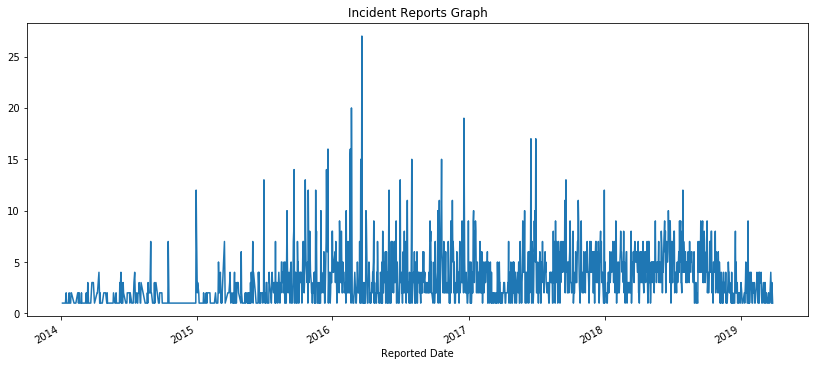

In [154]:
dataframe.groupby('Reported Date')['Reported Date'].count().plot(kind='line', title="Incident Reports Graph", figsize=(14,6))

**Taking a look at Number of incident report each year, as we can clearly see the trend is spiking every year with 2018 seeing more than 1400 incidents of Migrants disappearance / deaths**

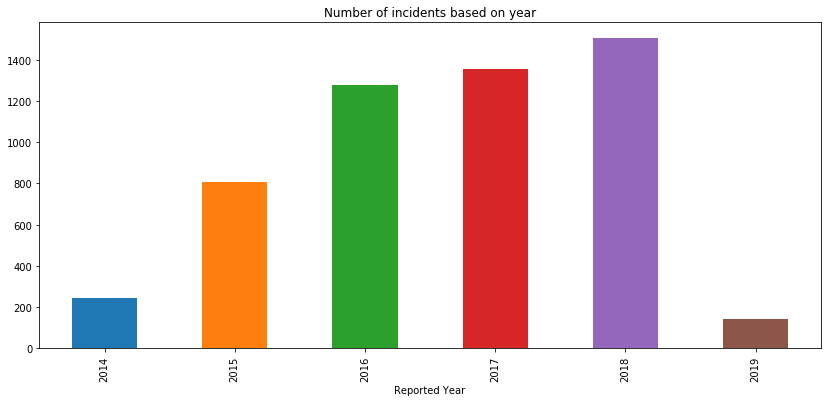

In [155]:
dataframe.groupby('Reported Year')['Reported Year'].count().plot(kind='bar', title="Number of incidents based on year", figsize=(14,6))

Since we are halfway through 2019, we compare the first six months data of every year to see if 2019 is following the same trend as the year before

Text(0.5, 1.0, 'Comparing first six months of 2019 with previous years')

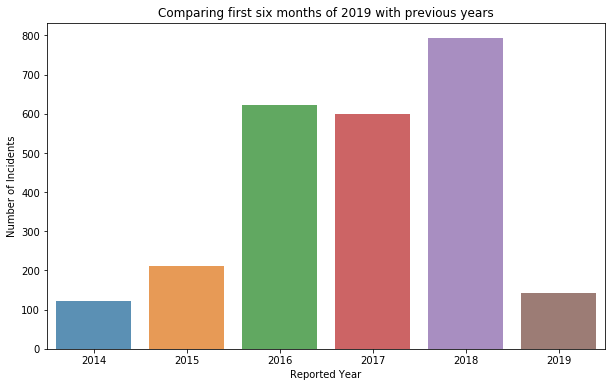

In [156]:
monthstocheck=['Jan','Feb','Mar','Apr','May','Jun']
# data = dataframe[dataframe['Reported Month'].isin(monthstocheck)]['Reported Year'].value_counts()
# dataframe[dataframe['Reported Month'].isin(monthstocheck)]['Reported Year'].value_counts().sort_index(ascending=False).plot(kind='barh', title="Comparison First six months of 2019 with previous years", figsize=(10,6))
plt.figure(figsize=(10,6))
sns.barplot(dataframe[dataframe['Reported Month'].isin(monthstocheck)]['Reported Year'].value_counts().index,dataframe[dataframe['Reported Month'].isin(monthstocheck)]['Reported Year'].value_counts().values, alpha=0.8)
plt.ylabel("Number of Incidents")
plt.xlabel("Reported Year")
plt.title("Comparing first six months of 2019 with previous years")

While it's a good news that 2019 has seen a lot less incidents than the previous years, the number is usually high in the later months for every year

In [157]:
dataframe.isna().sum()

Web ID                                    0
Region of Incident                        0
Reported Date                             0
Reported Year                             0
Reported Month                            0
Number Dead                             191
Minimum Estimated Number of Missing    4830
Total Dead and Missing                    0
Number of Survivors                    4584
Number of Females                      4436
Number of Males                        2520
Number of Children                     4689
Cause of Death                            0
Location Description                     10
Information Source                        2
Location Coordinates                      1
Migration Route                        2673
URL                                    2141
UNSD Geographical Grouping               11
Source Quality                            0
dtype: int64

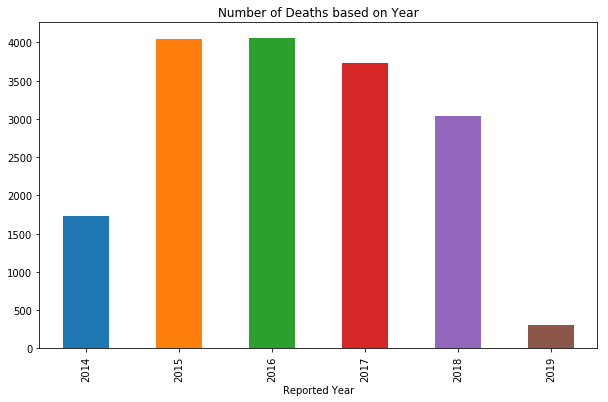

In [158]:
dataframe.groupby('Reported Year')['Number Dead'].sum().astype(int).plot(kind='bar', title="Number of Deaths based on Year", figsize=(10,6))

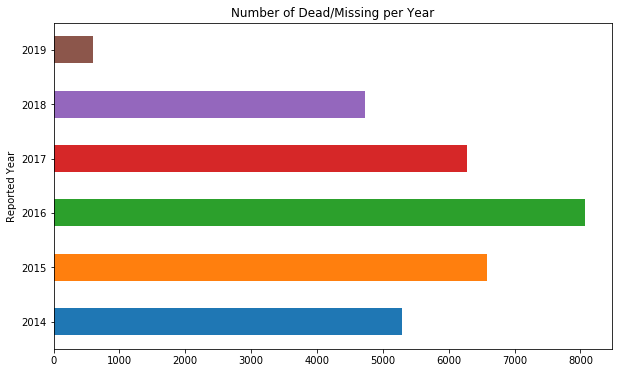

In [159]:
dataframe.groupby('Reported Year')['Total Dead and Missing'].sum().astype(int).plot(kind='barh', title="Number of Dead/Missing per Year", figsize=(10,6))

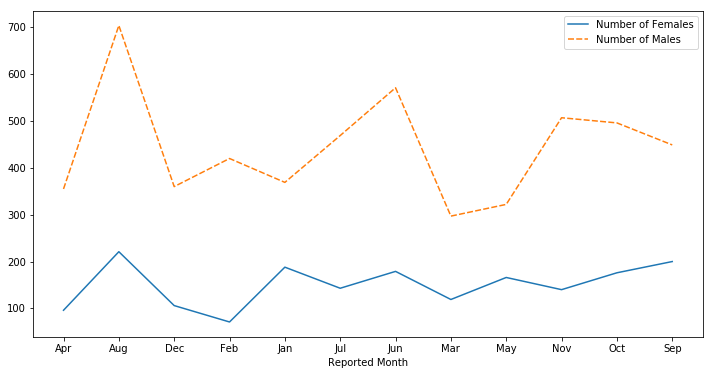

In [160]:
df = dataframe.groupby('Reported Month').agg({'Number of Females':'sum','Number of Males':'sum'}).astype(int)
# x = dataframe['Reported Month'].value_counts().index.values
# y = dataframe['Reported Month'].value_counts().values
plt.figure(figsize=(12,6))
sns.lineplot(data=df)

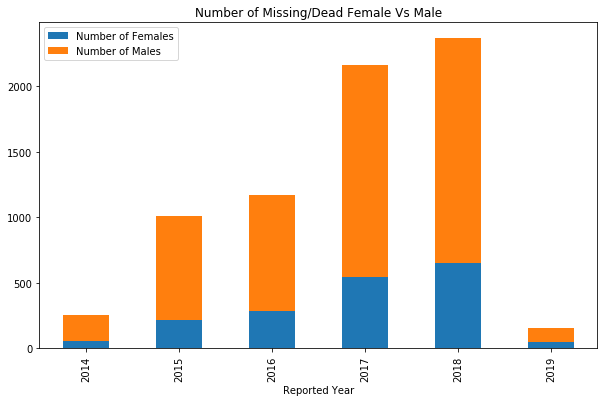

In [161]:
dataframe.groupby('Reported Year').agg({'Number of Females':'sum','Number of Males':'sum'}).astype(int).plot(kind='bar',stacked=True, title="Number of Missing/Dead Female Vs Male", figsize=(10,6))

In [162]:
dataframe.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,51591,Mediterranean,2019-03-28,2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5
1,51588,Mediterranean,2019-03-26,2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,51589,Mediterranean,2019-03-26,2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,51590,Mediterranean,2019-03-26,2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,51587,Central America,2019-03-25,2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3


Here we take a look at some of the most common cause of death. We make a word cloud at first followed by more illustrative bar graphs.

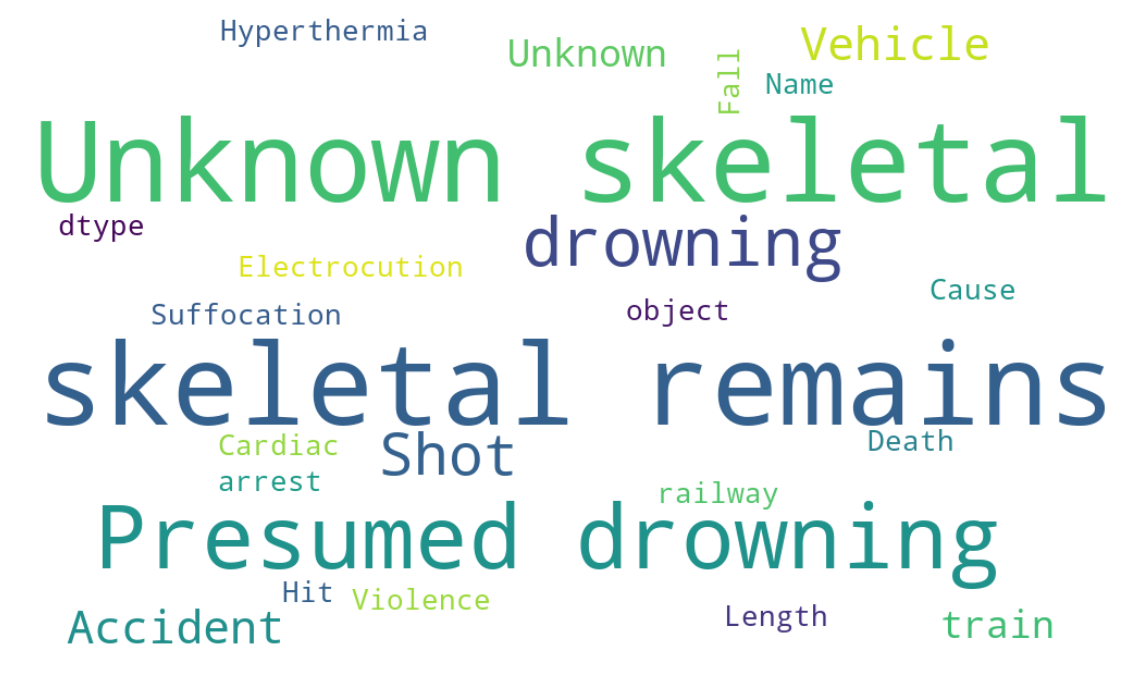

In [163]:
wordcloud = WordCloud(
    width = 1000,
    height = 600,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(dataframe['Cause of Death']))

fig = plt.figure(
    figsize = (20, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
# plt.tight_layout(pad=0)
plt.show()

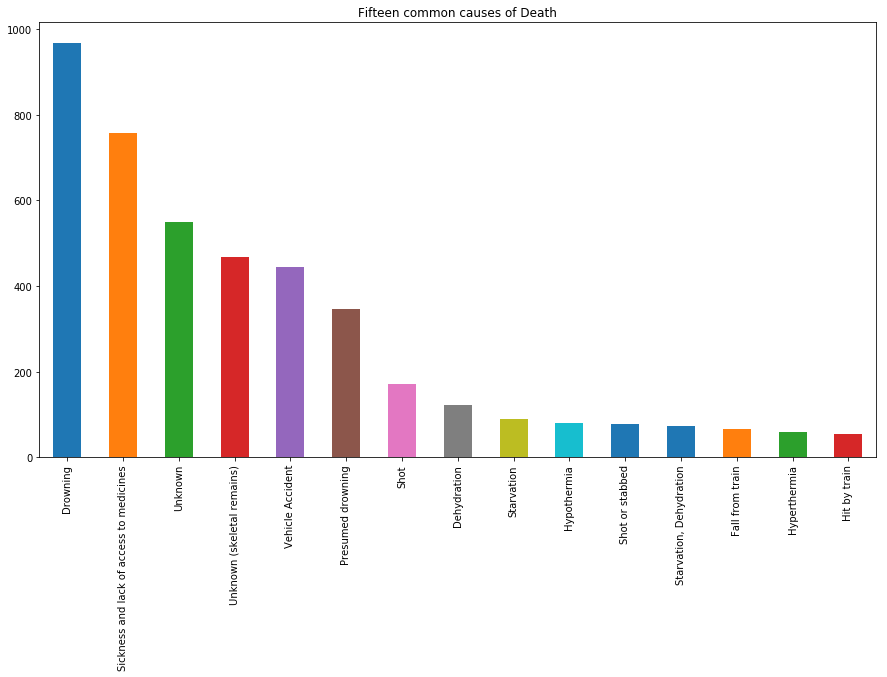

In [164]:
dataframe['Cause of Death'].value_counts()[0:15].plot(kind='bar', title="Fifteen common causes of Death", figsize=(15,8))

**Number of Incidents based on Region**

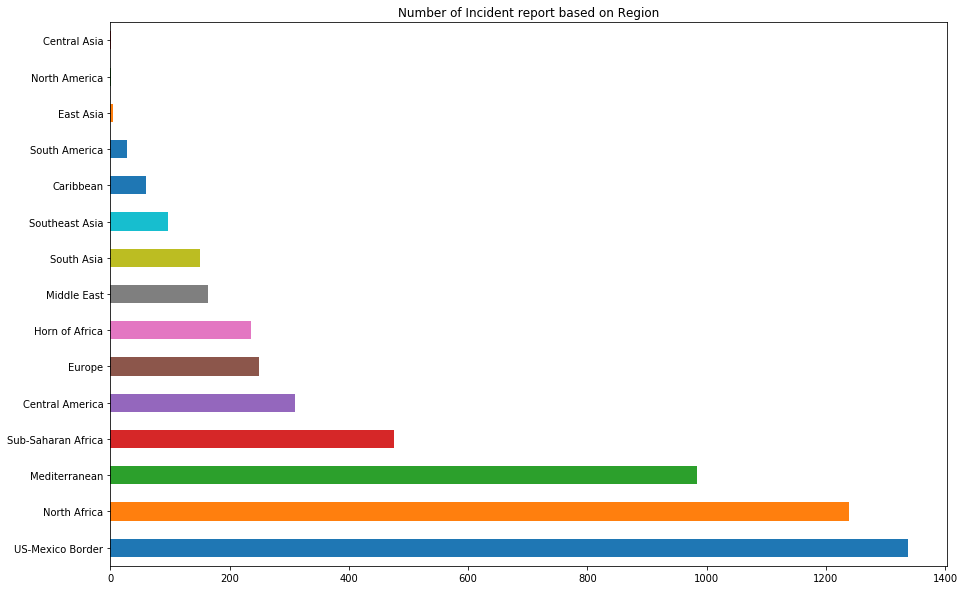

In [165]:
dataframe['Region of Incident'].value_counts().plot(kind='barh', title="Number of Incident report based on Region", figsize=(15,10))

In [166]:
dataframe.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,51591,Mediterranean,2019-03-28,2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5
1,51588,Mediterranean,2019-03-26,2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,51589,Mediterranean,2019-03-26,2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,51590,Mediterranean,2019-03-26,2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,51587,Central America,2019-03-25,2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3


**Number of Deaths in every region**

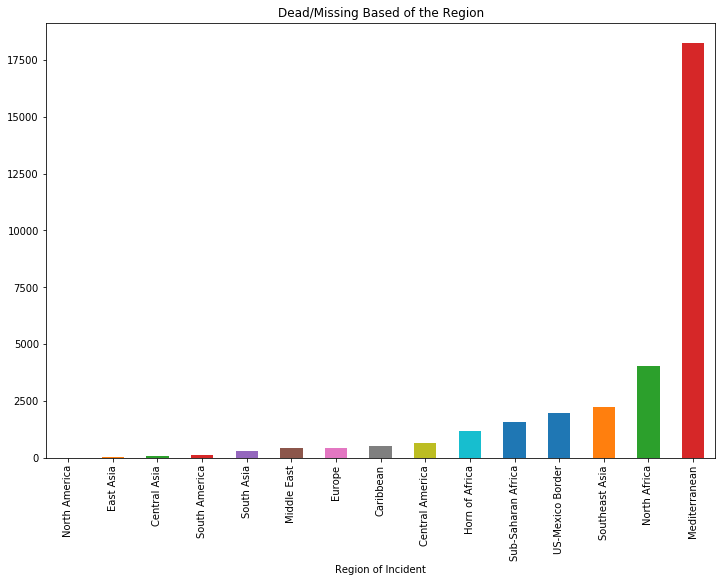

In [167]:
dataframe.groupby('Region of Incident')['Total Dead and Missing'].sum().sort_values().plot(kind='bar', title="Dead/Missing Based of the Region", figsize=(12,8))

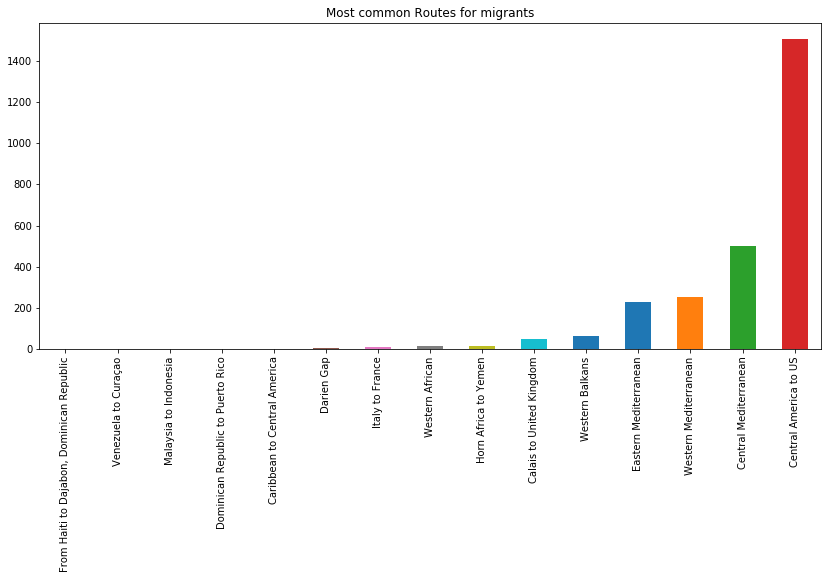

In [168]:
dataframe['Migration Route'].value_counts().sort_values().plot(kind='bar', title="Most common Routes for migrants", figsize=(14,6))

Here we try to cluster all the incident report into an interactive map. You can see more detailed markers if you click on the clusters.

In [169]:
dataframe[['latitude','longitude']] = dataframe['Location Coordinates'].str.split(",",expand=True)

In [170]:
dataframe['latitude'] = dataframe['latitude'].astype(float).round(2)
dataframe['longitude'] = dataframe['longitude'].astype(float).round(2)

In [171]:
dataframe.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality,latitude,longitude
0,51591,Mediterranean,2019-03-28,2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5,38.36,26.17
1,51588,Mediterranean,2019-03-26,2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5,39.44,26.38
2,51589,Mediterranean,2019-03-26,2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3,35.87,-5.34
3,51590,Mediterranean,2019-03-26,2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1,35.64,-5.28
4,51587,Central America,2019-03-25,2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3,19.33,-98.07


In [172]:
dataframe = dataframe.dropna(subset=['latitude','longitude'])

In [173]:
dataframe.isna().sum()

Web ID                                    0
Region of Incident                        0
Reported Date                             0
Reported Year                             0
Reported Month                            0
Number Dead                             191
Minimum Estimated Number of Missing    4829
Total Dead and Missing                    0
Number of Survivors                    4583
Number of Females                      4436
Number of Males                        2519
Number of Children                     4688
Cause of Death                            0
Location Description                     10
Information Source                        2
Location Coordinates                      0
Migration Route                        2672
URL                                    2141
UNSD Geographical Grouping               11
Source Quality                            0
latitude                                  0
longitude                                 0
dtype: int64

In [174]:
worldMap = folium.Map(zoom_start=16)

In [175]:
worldMap

In [176]:
mc = MarkerCluster()
for row in dataframe.itertuples():
    mc.add_child(folium.Marker(location=[row.latitude,row.longitude]))

In [177]:
worldMap.add_child(mc)